# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation


<span style="color:red"> Q1: 31, Q2: 49, total: 80</span>

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 1 iamlans`

You can check the status of your submissions with the `show submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

<span style="color:red">OK</span>

In [2]:
# Loads and assigns partA variable to train_20news_partA.csv and partB variable
#to train_20news_partB.csv
data_path1 = os.path.join(os.getcwd(), 'datasets','train_20news_partA.csv')
partA = pd.read_csv(data_path1, delimiter = ',')
data_path2 = os.path.join(os.getcwd(), 'datasets','train_20news_partB.csv')
partB = pd.read_csv(data_path2, delimiter = ',')

### ========== Question 1.2 ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

<span style="color:red">OK</span>

In [3]:
# Displays information about partA
partA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


### ========== Question 1.3 ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

The dataset consists of 2129 data points, comparable to the number of rows, and 521 attributes, which is comparable to the number of columns.


<span style="color:red">target variable is not an attribute, hence 520 attributes</span>

### ========== Question 1.4  ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

<span style="color:red">OK</span>


In [4]:
# Summary statistics for partA
partA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 ==========
Display the first 7 instances of dataset A.

<span style="color:red">OK</span>

In [5]:
# Fist 7 instances in partA
partA.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

<span style="color:red">fine but we only asked for attribute names not actual words</span>

In [6]:
# First 100 attributes of PartA


for x in range (0,9):
    y = partA.columns.values[x]
    print(y[3:])
for x1 in range (10,99):
    y1 = partA.columns.values[x1]
    print(y1[4:])
for x2 in range (99,100):
    y2 = partA.columns.values[x2]
    print(y2[5:])

aaa
pins
kmr
notion
queens
dwyer
defenseman
gld
tocchet
buying
internet
slots
compatible
transfer
baltimore
mean
person
performance
support
tor
gm
mouse
base
population
bob
set
it
earth
faith
steve
caps
printer
east
cable
adapter
mss
catcher
bullpen
obp
innocent
european
angeles
settings
words
rit
shots
ports
vga
coverage
jumpers
bases
sea
pts
behavior
domi
sabres
yzerman
messier
goalies
hawks
our
sx
view
hitters
richard
point
nyi
mvp
kill
nl
field
connector
stars
th
install
traded
configuration
standard
rotation
ultb
sports
pds
canada
did
clock
first
switch
tonight
record
singer
majors
royals
does
flames
of
series
plays
det
pitched


### ========== Question 1.7 ==========
Familiarise yourself with the [`stripplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

<span style="color:red">wrong, you were supposed to split it by class</span>

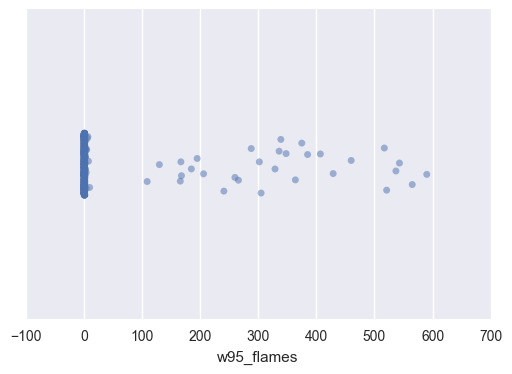

In [7]:
# Creates stripplot of attribute w95_flames
flames_data = partA.iloc[:,94]  
plot = sns.stripplot(x = flames_data, jitter=True, alpha=.5)

### ========== Question 1.8 ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

<span style="color:red">OK</span>

In [8]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

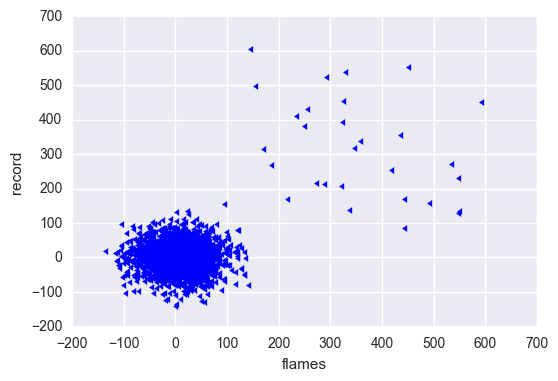

In [9]:
# Joint Distribution of two attributes w95_flames and w90_record
record_data = partA.iloc[:,89]
plot2 = scatter_jitter(flames_data,record_data, jitter=True)
plt.xlabel("flames")
plt.ylabel("record")

### ========== Question 1.9 ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a result of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

<span style="color:red">OK but requires more commentary and justification</span>

In [10]:
# Removes all data points with outliers that have word counts greater than 40

new_A_clean = partA.copy()   #makes copy of original data

new_A_clean = new_A_clean[new_A_clean < 40] #finds counts of attributes of data points that are outliers
new_A = new_A_clean.dropna()      #removes the data points that contain these outliers

### ========== Question 1.10 ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

<span style="color:red">OK</span>

In [11]:
# Number of remaining data points after outliers have been removed
print('Number of datapoints: ' , new_A.shape[0])

#Number of documents that have been expluded. 
#Calculated by subtracting the number of rows in the orignal dataset, by the number of rows in the new clean dataset
print('Number of removed documents: ' , partA.shape[0]-new_A.shape[0])

Number of datapoints:  2072
Number of removed documents:  57


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

<span style="color:red">OK</span>

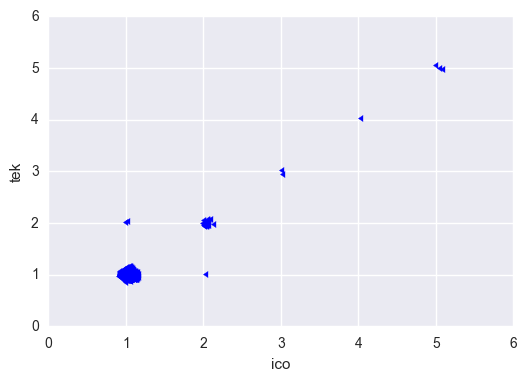

In [12]:
# Joint distribution of attributes w281_ico and w273_tek
ico_data = new_A.iloc[:,280]  
tek_data = new_A.iloc[:,272]
plot3 = scatter_jitter(ico_data,tek_data, jitter=0.2)
plt.xlabel('ico')
plt.ylabel('tek')

### ========== Question 2.2 ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

The linear nature of the graph in 2.1 demonstrates the independence assumption for a Naive Bayes classifier which assumes that each attribute in independent of all other attributes in the dataset. Consequently, if this assumption is not made, and instead the attributes are assumed to be mutually dependent, joint distribution can not be factored out. 



<span style="color:red">fine, but need to comment more about covariance matrix calculation</span>

### ========== Question 2.3 ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [14]:
from sklearn.naive_bayes import GaussianNB

X_tr = np.array(new_A.ix[:,0:520]) #all the attributes other than class 
Y_tr = np.array(new_A.ix[:,520])  #class (target)
nb_model = GaussianNB()     # calls Naive Bayes class 
nb_fit = nb_model.fit(X_tr,Y_tr,None)  #fits the Gaussian model to the dataset
predict= nb_model.predict(X_tr) #predicts output
nb_fit.score(X_tr,Y_tr,None)   #computes accuracy

0.88996138996138996

### ========== Question 2.4 ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.


<span style="color:red"> fine but label classes with something more descriptive than just their indices, you could've used their names </span>


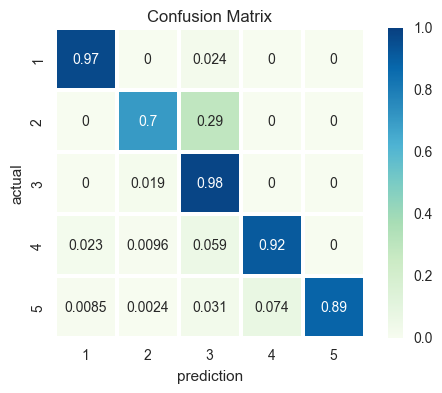

In [18]:
from sklearn.metrics import confusion_matrix

matrix =  confusion_matrix(Y_tr,predict) #generates confusion matrix
norm_matrix = matrix/ matrix.sum(axis =1) #normalizes confusion matrix
classes = 1,2,3,4,5     #defines the range of possible class attribute of data points


def plot_confusion_matrix(norm_matrix,classes, cmap=plt.cm.Blues):
    sns.heatmap(norm_matrix,0,1, xticklabels= classes, yticklabels= classes, annot = True, linewidth=2, square=True, cmap="GnBu")
    plt.title('Confusion Matrix')
    plt.xlabel('prediction')
    plt.ylabel('actual')
    

plot_confusion_matrix(norm_matrix,classes = classes)     #plots the confusion matrix for the normalized, clean data set

### ========== Question 2.5  ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

The results of the confusion matrix above are a visual represention of the classification accuracy calculated in question 2.3. As expected, the heatmap shows the classifications with the highest accuracy along the diagonal (darker squares), which are comparable to the computed accuracy. The outer percentages are marginal and show low probability of incorrect classification. 



<span style="color:red"> fine but should've commented more on misclassifications</span>


### ========== Question 2.6 ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

<span style="color:red">OK</span>

In [21]:
X1 = np.array(partA.ix[:,0:520])  #all attributes other than class
Y1 = np.array(partA.ix[:,520])   #class (target)

nb_fit1= nb_model.fit(X1,Y1)   #fits Gaussian model to uncleaned dataset A
nb_fit1.score(X1,Y1,None)   #computes accuracy

0.20526068576796619

### ========== Question 2.7 ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

By cleaning up the dataset, the classification accuracy of the Naive Bayes model is significantly higher, as the accuracy on the cleaned dataset is approximately 88.9% and the accuracy of the uncleaned dataset is a mere 20.5%.  This demonstrates that the existence of outliers inhibits the performance ability of a Naive Bayes classification.



<span style="color:red">OK</span>

### ========== Question 2.8 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

<span style="color:red">OK</span>

Classification accuracy: 0.96875


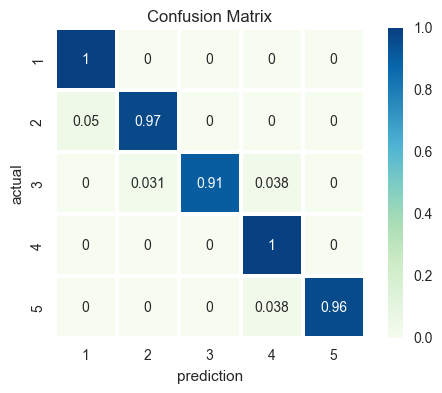

In [23]:
X2 = np.array(partB.ix[:,0:520])  #all attributes other than class
Y2 = np.array(partB.ix[:,520])   #class (target)

nb_fit2= nb_model.fit(X2,Y2)   #fits Gaussian model to dataset B
predict_B = nb_model.predict(X2)  #predicts output

print('Classification accuracy:',nb_fit2.score(X2,Y2,None))   #prints classification accuracy

matrix_B =  confusion_matrix(Y2,predict_B)      #generates confusion matrix
norm_matrix_B = matrix_B/ matrix_B.sum(axis =1)  #normalized confusion matrix

plot_confusion_matrix(norm_matrix_B, classes= classes)   #plots confusion matrix

### ========== Question 2.9 ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

A performance with an classification accuracy of approximately 96.9% is acceptable. According to the confusion matrix is question 2.8, classes one and four are the easiest to predict, followed closely by classes two and five. Though three is hardest to predict based on the output of the confusion matrix, it still has a 91% accuracy which is acceptable. 


<span style="color:red">OK</span>

### ========== Question 2.10 ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

A reasonable baseline for comparing the performance of each classification is to determine the class that is most frequent among data points within the data set. 

<span style="color:red">OK</span>

### ========== Question 2.11 ==========

Estimate the baseline performance.

<span style="color:red">OK</span>

In [24]:
# Baseline performance estimator is based on the class frequencies of dataset B.
# This is done by calculating the frequency of each class, finding the class with the highest frequency,
# and then printing that class and the accuracy as the classifier perdiction.

freq = pd.Series(partB.ix[:,520])
freq_counts = freq.value_counts()
sum = freq_counts.sum()

for x in range (1, len(freq_counts)+1):
    if freq_counts[x] == freq_counts.max():
        print('Class Prediction:', x )
        print('Classification Accuracy:', freq_counts[x]/sum)

Class Prediction: 2
Classification Accuracy: 0.25


### ========== Question 2.12 ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

<span style="color:red">OK</span>

Classification accuracy on the test set by using a Random Forest: 0.859375


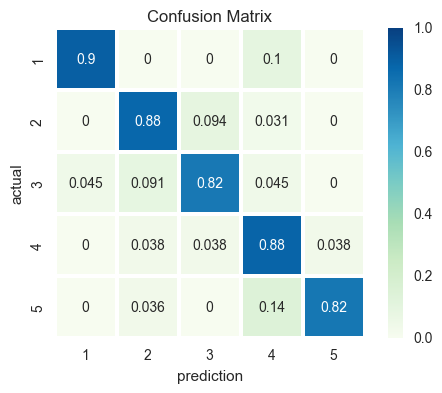

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 50).fit(X=X_tr, y=Y_tr)
X_ts = partB.drop('class', axis=1)
y_ts = Y2
rf_prediction = rf.predict(X=X_ts)

print('Classification accuracy on the test set by using a Random Forest:', accuracy_score(y_ts, rf.predict(X=X_ts)))
plt.figure()
cm = confusion_matrix(y_ts, rf_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes= classes)

### ========== Question 2.13 ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier.

Random Forest seems to genereate a consistently high classification accuracy, regardless of whether or not the outliers of the dataset have been removed because of how it samples. Naive Bayes only produces an accurate output on a cleaned (new_A) or relatively clean (partB contains very few outliers) dataset. When a large number of outliers remain, the accuracy is significantly lower, comparable to classifying by the baseline. 


<span style="color:red"> fine but accuracy is not everything, comment about specific suitability of NB gaussians to this type of data taking into account assumptions and weaknesses</span>